# Machine learning - Sticker Sales Machine learning Ensemble


The goal is to develop a machine learning model that accurately forecasts the number of Kaggle-branded sticker sales across different stores and countries. The predictions should consider temporal patterns, seasonality, holidays, and other potential trends inherent in the synthetic dataset. Achieving accurate predictions will require a balance of feature engineering and model selection, with submissions evaluated using the Mean Absolute Percentage Error (MAPE).

This problem aims to simulate real-world challenges in sales forecasting, providing an opportunity to test and refine forecasting skills in a controlled environment.

In [ ]:
# Import of libraries

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())




input- Databas

In [ ]:
# Database
train_df = pd.read_csv('playground-series-s5e1/train.csv', parse_dates=['date'])
test_df = pd.read_csv('playground-series-s5e1/test.csv', parse_dates=['date'])

# Viewing dataset
train_df

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [7]:
# Viewing first 5 data
train_df.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [8]:
# Viewing 5 latest data
train_df.tail()

,id,date,country,store,product,num_sold
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0
230129,230129,2016-12-31,Singapore,Premium Sticker Mart,Kerneler Dark Mode,1622.0


In [9]:
# Info data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        230130 non-null  int64         
 1   date      230130 non-null  datetime64[ns]
 2   country   230130 non-null  object        
 3   store     230130 non-null  object        
 4   product   230130 non-null  object        
 5   num_sold  221259 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 10.5+ MB


In [10]:
# Type data
train_df.dtypes

id                   int64
date        datetime64[ns]
country             object
store               object
product             object
num_sold           float64
dtype: object

In [11]:
# Viewing rows and columns
train_df.shape

(230130, 6)

# Data cleaning

In [12]:
print("Checking for missing values in each column:")
print(train_df.isnull().sum())

Checking for missing values in each column:
id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64


In [13]:
# Checking the number of null values ​​in specific columns
print(train_df[['num_sold']].isnull().sum())

num_sold    8871
dtype: int64


***@@**

In [14]:
# Drop 'id' column
train_df = train_df.drop(['id'], axis=1)
train_df

,date,country,store,product,num_sold
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...
230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [15]:
# Remove columns with null data
train_df = train_df.dropna(subset=['num_sold'])

# Check for missing values in each column
print("Checking for missing values in each column:")
print(train_df.isnull().sum())

Checking for missing values in each column:
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64


**@@**

In [16]:
# Remove columns with null data
train_df = train_df.dropna(subset=['num_sold'])

# Check for missing values in each column
print("Checking for missing values in each column:")
print(train_df.isnull().sum())

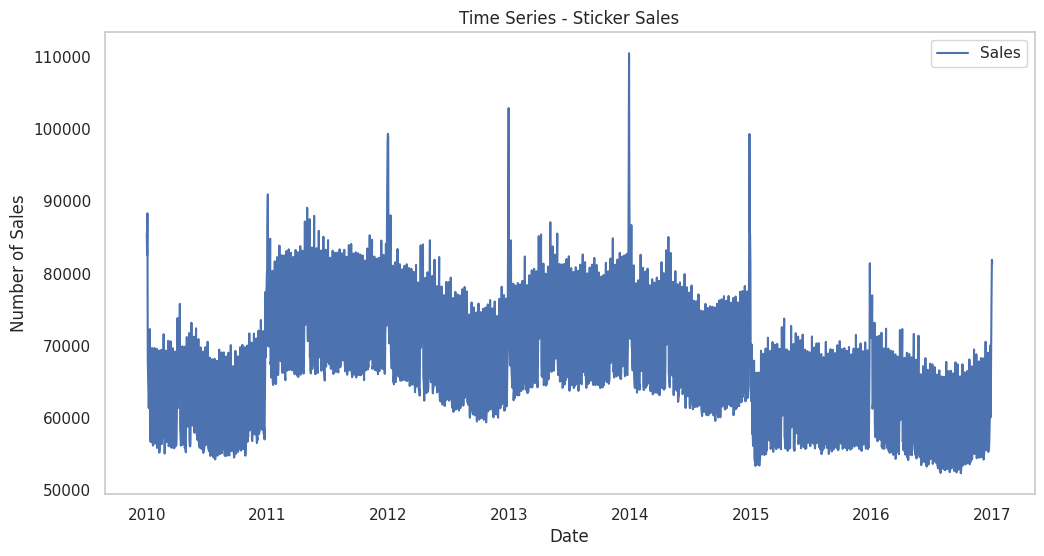

In [18]:
# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(grouped_data, label="Sales")
plt.title("Time Series - Sticker Sales")
plt.xlabel("Date")
plt.ylabel("Number of Sales")
plt.legend()
plt.grid(False)
plt.show()

## - Preprocessing

In [19]:
# Filter for Finland and Kaggle product
df_filtered = train_df[(train_df['country'] == 'Finland') & (train_df['product'] == 'Kaggle')]

# Set the time index
df_filtered.set_index('date', inplace=True)
df_filtered = df_filtered[['num_sold']]

# Ensure the 'date' column is in datetime format
df_filtered.index = pd.to_datetime(df_filtered.index)
df_filtered

,num_sold
date,
2010-01-01,926.0
2010-01-01,1948.0
2010-01-01,2304.0
2010-01-02,869.0
2010-01-02,1867.0
...,...
2016-12-30,2002.0
2016-12-30,2303.0
2016-12-31,972.0


In [20]:
# Group by index (date) and calculate the mean
df_filtered = df_filtered.groupby(df_filtered.index).mean()

# Check for duplicate indices after grouping
print("Duplicate indices after grouping:", df_filtered.index.duplicated().sum())

# Reset the index
df_filtered = df_filtered.reset_index()

# Set the date index again (without duplicates)
df_filtered = df_filtered.set_index('date')

# Check for duplicate indices again
print("Duplicate indices after resetting:", df_filtered.index.duplicated().sum())

# Keep only the first occurrence of each duplicate index
df_filtered = df_filtered[~df_filtered.index.duplicated(keep='first')]

# Check for duplicate indices after removal
print("Duplicate indices after removal:", df_filtered.index.duplicated().sum())

Duplicate indices after grouping: 0
Duplicate indices after resetting: 0
Duplicate indices after removal: 0


# Statistical test

**@@@@**

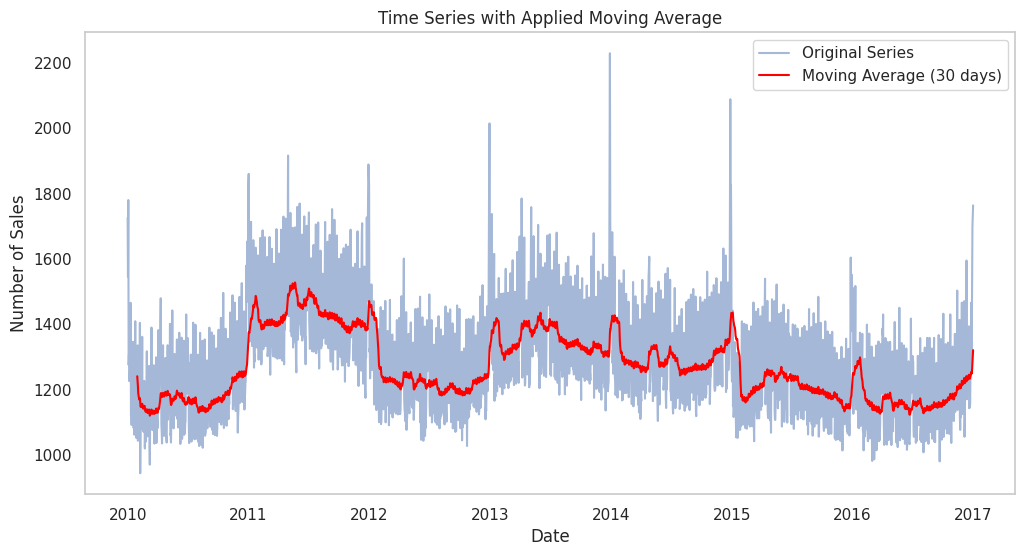

In [21]:
# Calculate the moving average
window_size = 30
df_filtered['moving_avg'] = df_filtered['num_sold'].rolling(window=window_size).mean()
#The rolling mean can be useful for smoothing out fluctuations in the data and highlighting trends.
# Remove missing values generated by the moving average
df_filtered['moving_avg'] = df_filtered['moving_avg'].dropna()

# Visualize the smoothed time series
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['num_sold'], label="Original Series", alpha=0.5)
plt.plot(df_filtered['moving_avg'], label=f"Moving Average ({window_size} days)", color='red')
plt.title("Time Series with Applied Moving Average")
plt.xlabel("Date")
plt.ylabel("Number of Sales")
plt.legend()
plt.grid(False)
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

# Function to perform the Dickey-Fuller Test
def test_stationarity(series):
    result = adfuller(series)
    print("Dickey-Fuller Test")
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is NOT stationary.")

# Apply the Dickey-Fuller test to the original series
test_stationarity(df_filtered['num_sold'])

Dickey-Fuller Test
Test Statistic: -2.8208269394083754
p-value: 0.055359821255495274
Critical Values:
   1%: -3.432938355012086
   5%: -2.8626835272597217
   10%: -2.567378742868999
The series is NOT stationary.


In [23]:
# Apply first differencing to the series
df_filtered['num_sold_diff'] = df_filtered['num_sold'].diff()

# Remove missing values generated by differencing
df_filtered['num_sold_diff'] = df_filtered['num_sold_diff'].dropna()

# Ensure there are no missing values in the differenced series
df_filtered['num_sold_diff'] = df_filtered['num_sold'].diff()
df_filtered['num_sold_diff'] = df_filtered['num_sold_diff'].dropna()

# Check if there are still missing values
print("Missing values in the differenced series:", df_filtered['num_sold_diff'].isnull().sum())

Missing values in the differenced series: 1


In [24]:
# Identify issues in the original series
print("Missing values in the original series:", df_filtered['num_sold'].isnull().sum())
print("Infinite values in the original series:", np.isinf(df_filtered['num_sold']).sum())

# Ensure there are no missing values in the differenced series
df_filtered['num_sold_diff'] = df_filtered['num_sold'].diff()

# Remove missing and infinite values
df_filtered['num_sold_diff'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_filtered['num_sold_diff'] = df_filtered['num_sold_diff'].dropna()

# Check if there are still issues
print("Missing values after processing:", df_filtered['num_sold_diff'].isnull().sum())
print("Infinite values after processing:", np.isinf(df_filtered['num_sold_diff']).sum())

# Check if there are still missing or infinite values
print("Missing values:", df_filtered['num_sold_diff'].isnull().sum())
print("Infinite values:", np.isinf(df_filtered['num_sold_diff']).sum())

# Drop all rows with NaN in any column
df_filtered = df_filtered.dropna()

# Verify again
print("Missing values after complete removal:")
print(df_filtered.isnull().sum())

Missing values in the original series: 0
Infinite values in the original series: 0
Missing values after processing: 1
Infinite values after processing: 0
Missing values: 1
Infinite values: 0
Missing values after complete removal:
num_sold         0
moving_avg       0
num_sold_diff    0
dtype: int64


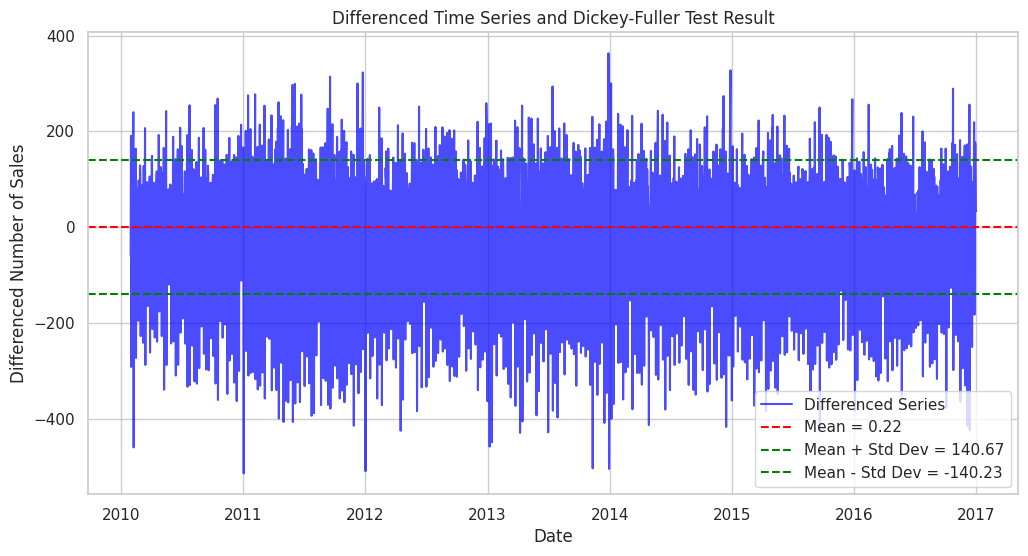

Dickey-Fuller Test Result:
Dickey-Fuller Test
Test Statistic: -13.038986798847315
p-value: 2.261832504844666e-24
Critical Values:
   1%: -3.4329684108437117
   5%: -2.8626968000025603
   10%: -2.56738580944
The series is stationary.


In [25]:
# Calculate mean and standard deviation of the differenced series
mean_value = df_filtered['num_sold_diff'].mean()
std_dev = df_filtered['num_sold_diff'].std()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['num_sold_diff'], label="Differenced Series", color='blue', alpha=0.7)
plt.axhline(mean_value, color='red', linestyle='--', label=f"Mean = {mean_value:.2f}")
plt.axhline(mean_value + std_dev, color='green', linestyle='--', label=f"Mean + Std Dev = {mean_value + std_dev:.2f}")
plt.axhline(mean_value - std_dev, color='green', linestyle='--', label=f"Mean - Std Dev = {mean_value - std_dev:.2f}")

# Add title and legends
plt.title("Differenced Time Series and Dickey-Fuller Test Result")
plt.xlabel("Date")
plt.ylabel("Differenced Number of Sales")
plt.legend()

# Show the plot
plt.show()

# Display the result of the Dickey-Fuller Test in the console
print("Dickey-Fuller Test Result:")
test_stationarity(df_filtered['num_sold_diff'])

# Training and testing division

In [27]:
# Split the time series into training and testing sets
train_size = int(len(df_filtered) * 0.8)
train_data = df_filtered['num_sold'][:train_size]
test_data = df_filtered['num_sold'][train_size:]

In [28]:
# Check sizes
print(f"Training Size: {len(train_data)}")
print(f"Testing Size: {len(test_data)}")

Training Size: 2022
Testing Size: 506


# Model AutoARIMA

In [29]:
%%time

from pmdarima import auto_arima

# Fit the AutoARIMA to find the best ARIMA parameters
arima_model = auto_arima(train_data,
                         seasonal=False,          # No seasonality for ARIMA
                         trace=True,              # Show progress
                         error_action='ignore',   # Ignore errors
                         suppress_warnings=True,  # Suppress warnings
                         stepwise=True            # More efficient fitting
                        )

# Fit the AutoARIMA to find the best SARIMA parameters
sarima_model = auto_arima(train_data,
                          seasonal=True,           # Consider seasonality for SARIMA
                          m=12,                    # Monthly seasonality
                          trace=True,              # Show progress
                          error_action='ignore',   # Ignore errors
                          suppress_warnings=True,  # Suppress warnings
                          stepwise=True            # More efficient fitting
                         )

# Get the best ARIMA parameters
print("Best ARIMA parameters:")
print(f"  (p, d, q): {arima_model.order}")

# Get the best SARIMA parameters
print("Best SARIMA parameters:")
print(f"  (p, d, q): {sarima_model.order}")
print(f"  (P, D, Q, m): {sarima_model.seasonal_order}")

# Viewing model
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25056.137, Time=1.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25791.758, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25646.444, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25396.055, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25789.758, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25127.142, Time=1.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25122.802, Time=0.63 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.56 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=24886.562, Time=2.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=25023.930, Time=1.37 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.53 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=3.16 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=24992.382, Time=2.26 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=4.17 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2022
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -12436.295
Date:                Wed, 08 Jan 2025   AIC                          24884.589
Time:                        04:03:05   BIC                          24918.257
Sample:                    01-30-2010   HQIC                         24896.945
                         - 08-13-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6699      0.032    -20.822      0.000      -0.733      -0.607
ar.L2         -0.3550      0.032    -10.924      0.000      -0.419      -0.291
ma.L1          0.1537      0.022      6.982      0.000       0.111       0.197
ma.L2         -0.2190      0.021    -10.425      0.000      -0.260      -0.178
ma.L3         -0.7762      0.018    -43.834      0.000      -0.811      -0.741
sigma2      1.294e+04    400.994     32.263      0.000    1.22e+04    1.37e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.06   Jarque-Bera (JB):                57.56
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.33
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
# Viewing model
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 2022
Model:             SARIMAX(3, 1, 3)x(2, 0, [], 12)   Log Likelihood              -12016.046
Date:                             Wed, 08 Jan 2025   AIC                          24052.092
Time:                                     04:03:05   BIC                          24108.205
Sample:                                 01-30-2010   HQIC                         24072.684
                                      - 08-13-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3099      0.546      0.567      0.570      -0.760       1.380
ar.L1         -1.2482      0.023    -55.041      0.000      -1.293      -1.204
ar.L2         -0.0034      0.041     -0.082      0.935      -0.084       0.077
ar.L3          0.5532      0.023     24.343      0.000       0.509       0.598
ma.L1          0.8416      0.013     62.772      0.000       0.815       0.868
ma.L2         -0.7090      0.016    -43.558      0.000      -0.741      -0.677
ma.L3         -0.8897      0.013    -68.988      0.000      -0.915      -0.864
ar.S.L12      -0.5207      0.023    -22.998      0.000      -0.565      -0.476
ar.S.L24      -0.3980      0.025    -16.085      0.000      -0.446      -0.350
sigma2      8550.4494    265.788     32.170      0.000    8029.514    9071.385
===================================================================================
Ljung-Box (L1) (Q):                  18.12   Jarque-Bera (JB):                20.79
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.06
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
# Make predictions with the ARIMA model
forecast_arima = arima_model.predict(n_periods=len(test_data))

# Evaluate performance on the test set
from sklearn.metrics import mean_absolute_percentage_error

mape_arima = mean_absolute_percentage_error(test_data, forecast_arima)
print(f"MAPE of the ARIMA model: {mape_arima * 100:.2f}%")

MAPE of the ARIMA model: 8.65%


In [32]:
# Make predictions with the SARIMA model
forecast_sarima = sarima_model.predict(n_periods=len(test_data))

# Evaluate performance on the test set
mape_sarima = mean_absolute_percentage_error(test_data, forecast_sarima)
print(f"MAPE of the SARIMA model: {mape_sarima * 100:.2f}%")

MAPE of the SARIMA model: 9.42%


## Model ARIMA

In [38]:
## ARIMA Model

from statsmodels.tsa.arima.model import ARIMA

# ARIMA model parameters obtained from AutoARIMA
arima_order = arima_model.order  # (p, d, q)

# Fit the ARIMA model on the complete dataset
arima_model = ARIMA(df_filtered['num_sold'], order=arima_order)
fitted_arima = arima_model.fit()

# Summary of the fitted model
print(fitted_arima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               num_sold   No. Observations:                 2528
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -15513.146
Date:                Wed, 08 Jan 2025   AIC                          31038.292
Time:                        04:04:55   BIC                          31073.300
Sample:                    01-30-2010   HQIC                         31050.994
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6701      0.029    -22.827      0.000      -0.728      -0.613
ar.L2         -0.3650      0.029    -12.594      0.000      -0.422      -0.308
ma.L1          0.1524      0.020      7.564      0.0

## Model SARIMA

In [39]:
## SARIMA Model
from statsmodels.tsa.statespace.sarimax import SARIMAX

### SARIMA model parameters obtained from AutoARIMA
# (p, d, q)
sarima_order = sarima_model.order         

# (P, D, Q, m)
sarima_seasonal_order = sarima_model.seasonal_order  

# Fit the SARIMA model on the complete dataset
sarima_model = SARIMAX(df_filtered['num_sold'],
                       order=sarima_order,
                       seasonal_order=sarima_seasonal_order)

fitted_sarima = sarima_model.fit(disp=False)

# Summary of the fitted model
print(fitted_sarima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                            num_sold   No. Observations:                 2528
Model:             SARIMAX(3, 1, 3)x(2, 0, [], 12)   Log Likelihood              -15227.330
Date:                             Wed, 08 Jan 2025   AIC                          30472.660
Time:                                     04:05:11   BIC                          30525.173
Sample:                                 01-30-2010   HQIC                         30491.714
                                      - 12-31-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3023      0.051    -25.778      0.000      -1.401      -1.203
ar.L2         -0.1008      

# Forecast

In [49]:
# ARIMA Forecast

# Make predictions for the next 30 periods
future_forecast_arima = fitted_arima.forecast(steps=100)

# Create an index for future predictions
future_index_arima = pd.date_range(start=df_filtered.index[-1], periods=101, freq='D')[1:]

In [50]:
# Make predictions for the next 30 periods
future_forecast_sarima = fitted_sarima.get_forecast(steps=100)

# Get predicted values and confidence intervals
forecast_values_sarima = future_forecast_sarima.predicted_mean
conf_int_sarima = future_forecast_sarima.conf_int()

# Create an index for future predictions
future_index_sarima = pd.date_range(start=df_filtered.index[-1], periods=101, freq='D')[1:]

In [51]:
# Make predictions for the next 50 periods
future_forecast_sarima = fitted_sarima.get_forecast(steps=100)

# Get predicted values
forecast_values_sarima = future_forecast_sarima.predicted_mean

# Create an index for future predictions
future_index_sarima = pd.date_range(start=df_filtered.index[-1], periods=101, freq='D')[1:]  # Adjusted for 50 periods

# Check sizes
print(f"Size of future_index_sarima: {len(future_index_sarima)}")
print(f"Size of forecast_values_sarima: {len(forecast_values_sarima)}")

Size of future_index_sarima: 100
Size of forecast_values_sarima: 100


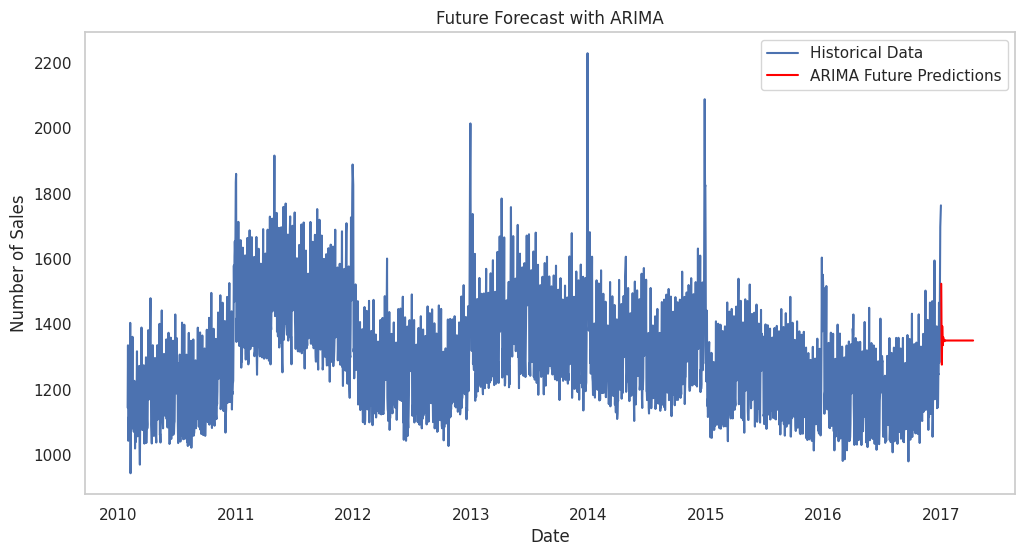

In [52]:
# Plot future predictions from ARIMA
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['num_sold'], label="Historical Data")
plt.plot(future_index_arima, future_forecast_arima, label="ARIMA Future Predictions", color='red')
plt.title("Future Forecast with ARIMA")
plt.xlabel("Date")
plt.ylabel("Number of Sales")
plt.legend()
plt.grid(False)
plt.show()

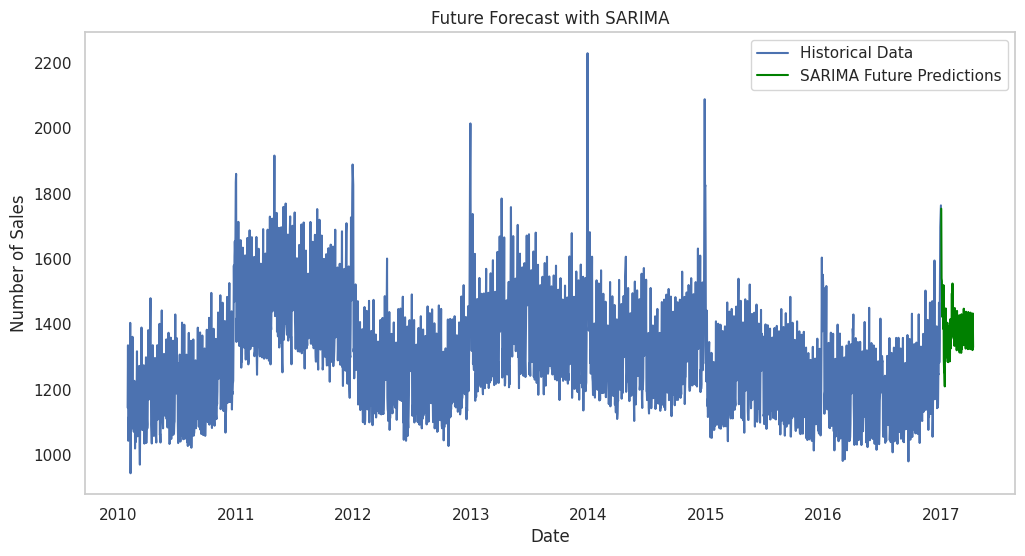

In [53]:
# Plot predictions from the SARIMA model
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['num_sold'], label="Historical Data")
plt.plot(future_index_sarima, forecast_values_sarima, label="SARIMA Future Predictions", color='green')
plt.title("Future Forecast with SARIMA")
plt.xlabel("Date")
plt.ylabel("Number of Sales")
plt.legend()
plt.grid()
plt.show()

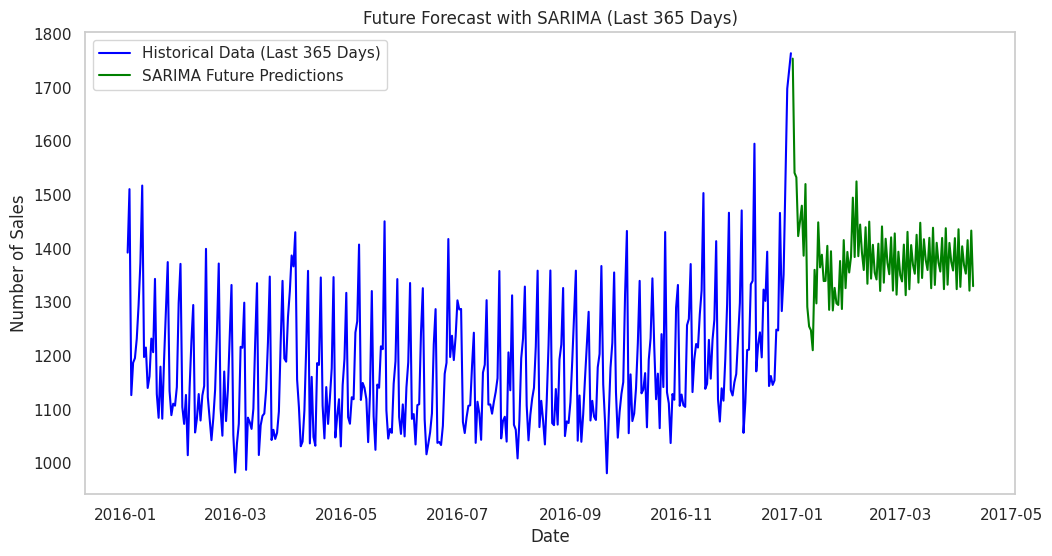

In [54]:
# Define the display range for the last 365 days
recent_data = df_filtered[-365:]

# Plot the graph with the reduced range
plt.figure(figsize=(12, 6))
plt.plot(recent_data.index, recent_data['num_sold'], label="Historical Data (Last 365 Days)", color='blue')
plt.plot(future_index_sarima, forecast_values_sarima, label="SARIMA Future Predictions", color='green')
plt.title("Future Forecast with SARIMA (Last 365 Days)")
plt.xlabel("Date")
plt.ylabel("Number of Sales")
plt.legend()
plt.grid()
plt.show()


## Recurrent Neural Network

In [56]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import tensorflow.keras.backend as K

In [58]:
# Select the column of interest
data = df_filtered['num_sold'].values.reshape(-1, 1)

In [59]:
# Select the column of interest
data = df_filtered['num_sold'].values.reshape(-1, 1)

# Scale the data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Display the scaler object
scaler

MinMaxScaler()

In [61]:
# Create training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [62]:
# Display shapes
train_data.shape

(2022, 1)

In [63]:
# training and testing sets
test_data.shape

(506, 1)

In [64]:
# Create input (X) and output (y) windows
def create_dataset(dataset, time_step=30):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step, 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30  # 30-day window
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [65]:
# Reshape the data to the format [samples, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [66]:
# Define a custom loss function for MAPE
def mape_loss(y_true, y_pred):
    epsilon = 1e-10  # To avoid division by zero
    
    return K.mean(K.abs((y_true - y_pred) / (y_true + epsilon))) * 100

In [67]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout

# Create the RNN model with multiple layers
model = Sequential()

# First RNN layer
model.add(SimpleRNN(64, activation='tanh', return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))  # Dropout for regularization

# Second RNN layer
model.add(SimpleRNN(64, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))  # Dropout for regularization

# Intermediate dense layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1))

# Compile the model with MAPE as the loss function
model.compile(optimizer='adam', loss=mape_loss)

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 30, 64)              │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,593 (57.00 KB)

 Trainable params: 14,593 (57.00 KB)

 Non-trainable params: 0 (0.00 B)

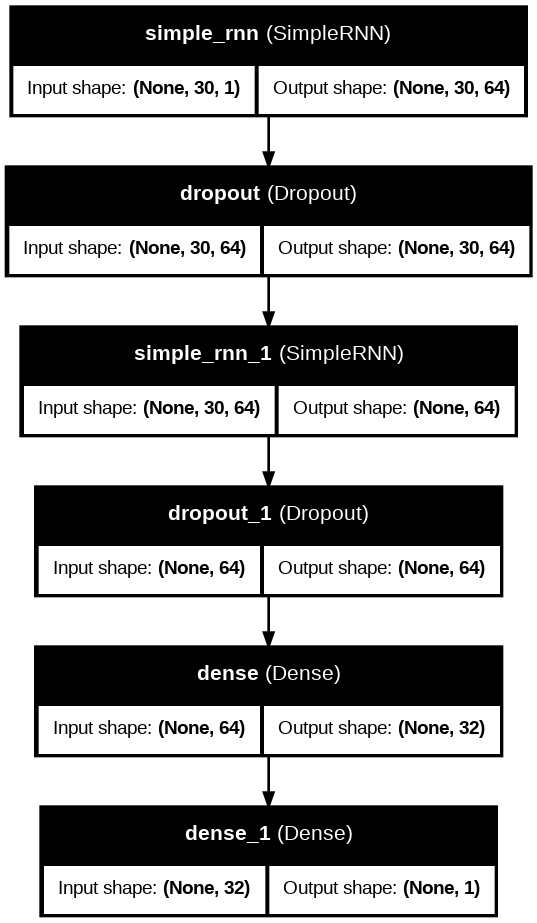

In [68]:
from tensorflow.keras.utils import plot_model

# Generate the model architecture diagram
plot_model(model,
           to_file="model_architecture.png",  # Path to save the diagram
           show_shapes=True,  # Display tensor shapes
           show_layer_names=True,  # Display layer names
           dpi=96  # Adjust resolution
          )

In [69]:
# Train the model
history = model.fit(X_train, y_train, epochs=150, 
                    batch_size=32, validation_data=(X_test, y_test), 
                    verbose=1)

Epoch 1/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 90.7550 - val_loss: 33.9335
Epoch 2/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33.6139 - val_loss: 28.2455
Epoch 3/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26.8920 - val_loss: 32.1030
Epoch 4/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26.0008 - val_loss: 23.6875
Epoch 5/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.1498 - val_loss: 24.8040
Epoch 6/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.1498 - val_loss: 23.1826
Epoch 7/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.1768 - val_loss: 24.2708
Epoch 8/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.7008 - val_loss: 26.1683
Epoch 9/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.4351 - val_loss: 22.7252
Epoch 10/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.7283 - val_loss: 22.5140
Epoch 11/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.9172 - val_loss: 22.1284
Epoch 12/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 

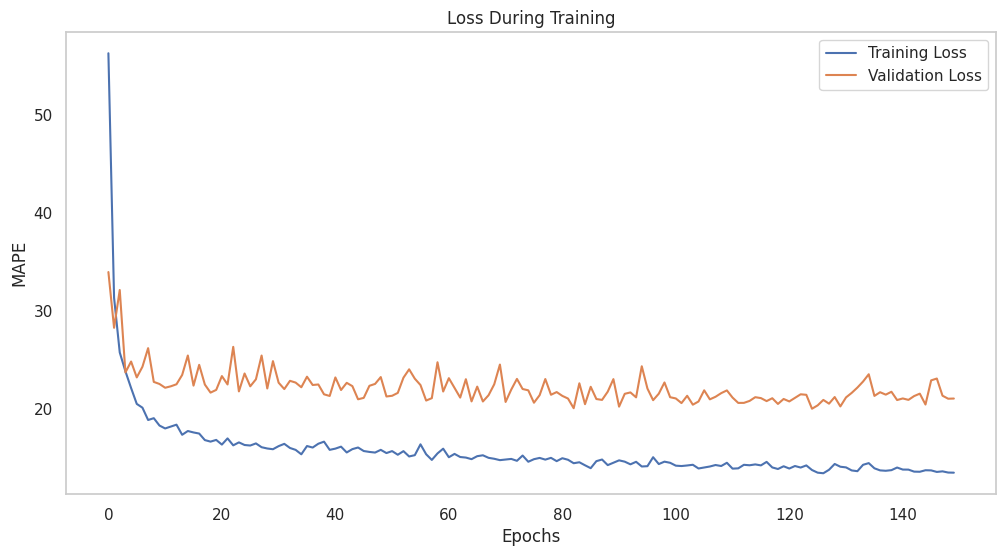

In [70]:
# Plot loss over training
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss During Training")
plt.xlabel("Epochs")
plt.ylabel("MAPE")
plt.legend()
plt.grid(False)
plt.show()

In [71]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [72]:
# Invert scaling to bring values back to their original format
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

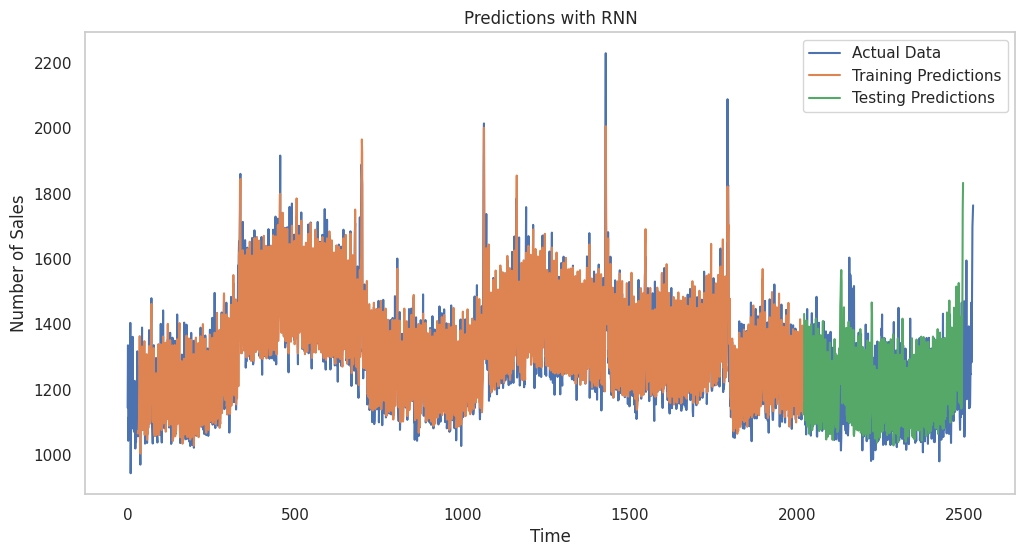

In [73]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_data), label="Actual Data")
train_range = range(time_step, time_step + len(train_predict))
plt.plot(train_range, train_predict, label="Training Predictions")
test_range = range(time_step + len(train_predict), time_step + len(train_predict) + len(test_predict))
plt.plot(test_range, test_predict, label="Testing Predictions")
plt.title("Predictions with RNN")
plt.xlabel("Time")
plt.ylabel("Number of Sales")
plt.legend()
plt.grid(False)
plt.show()


In [75]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.layers import SimpleRNN, Dense, Dropout
import contextlib
import io

# Placeholder data to emulate your environment (this should match your actual data and model setup)
time_step = 30  # Window size
n_forecast = 120  # Number of future periods

# Mock data for X_test and scaler (replace these with your actual data)
X_test = np.random.rand(100, time_step, 1)  # Example test set
scaler = MinMaxScaler(feature_range=(0, 1))  # Example scaler
scaler.fit(np.random.rand(100, 1))  # Fit scaler to random data

# Placeholder model (replace with your actual model)
model = Sequential()
model.add(SimpleRNN(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mape")

# Initialize the last known window
last_window = X_test[-1].reshape(1, time_step, 1)

# List to store future predictions
future_forecast = []

# Suppress TensorFlow logs during prediction
with contextlib.redirect_stdout(io.StringIO()):
    for _ in range(n_forecast):
        # Make the prediction for the next period
        next_pred = model.predict(last_window)
        next_pred = next_pred.reshape(1, 1, 1)  # Adjust shape to [1, 1, 1]
        future_forecast.append(next_pred[0, 0, 0])  # Store prediction
        last_window = np.append(last_window[:, 1:, :], next_pred, axis=1)  # Update the window

# Invert scaling for future predictions
future_forecast_actual = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

# Create date index for future predictions
future_index_rnn = pd.date_range(start="2025-01-01",  # Replace with df_filtered.index[-1] in your environment
                                 periods=n_forecast + 1,
                                 freq='D')[1:]

# Create DataFrame for future predictions
future_forecast_df = pd.DataFrame({'date': future_index_rnn, 'forecast': future_forecast_actual.flatten()})

future_forecast_df.head(n=20)

,date,forecast
0,2025-01-02,-0.034431
1,2025-01-03,-0.150441
2,2025-01-04,-0.455765
3,2025-01-05,0.125620
4,2025-01-06,-0.334127
5,2025-01-07,0.070818
6,2025-01-08,-0.060805
7,2025-01-09,0.318078
8,2025-01-10,-0.093521
9,2025-01-11,0.042249


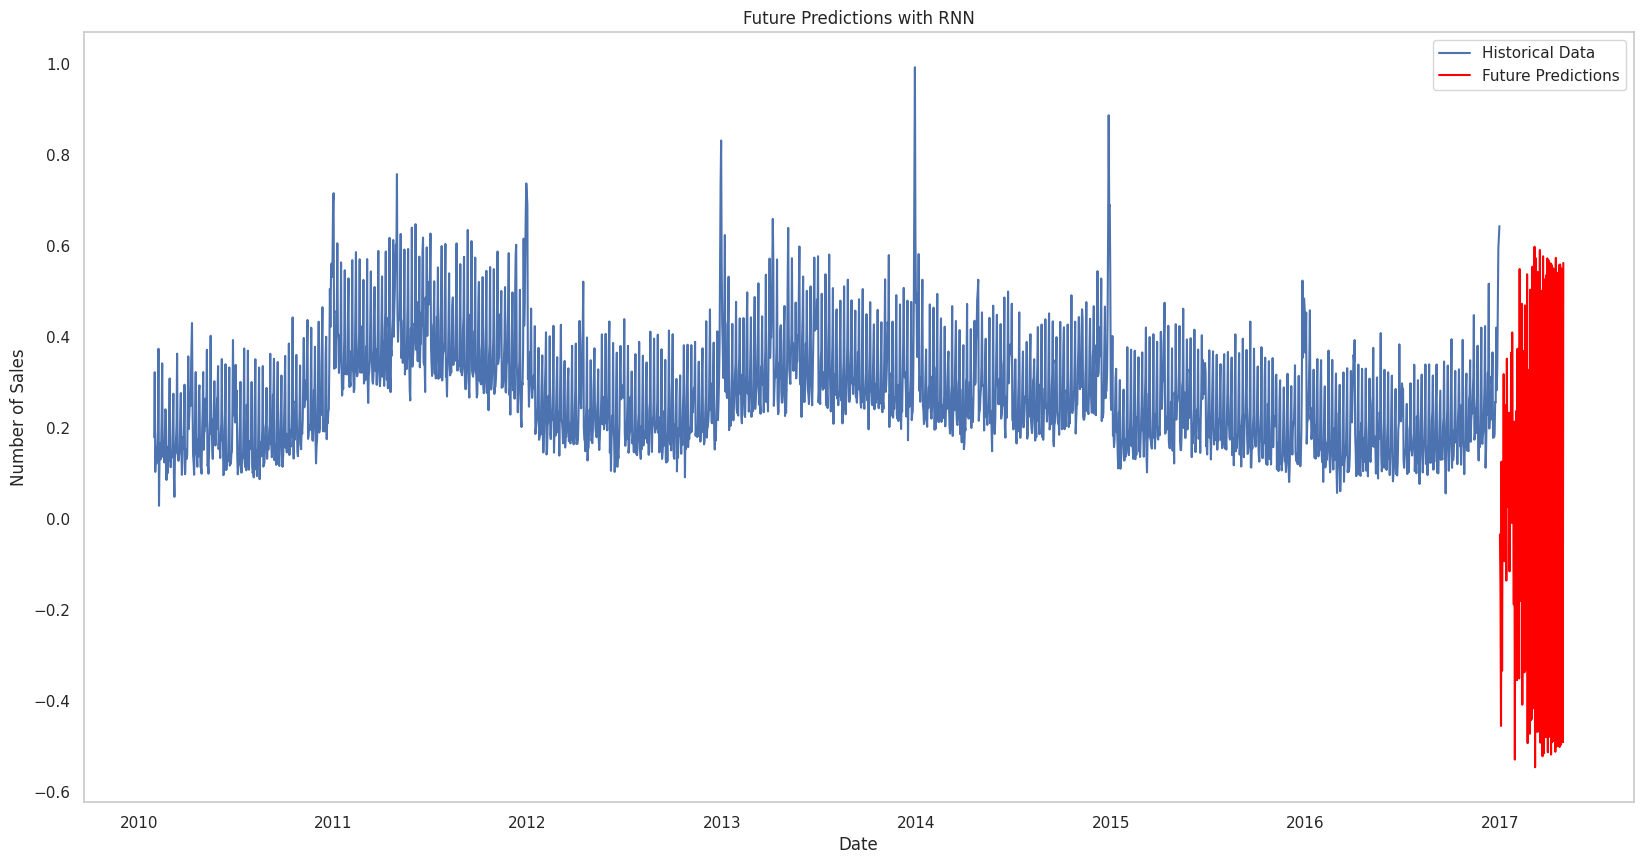

In [86]:
# Create date index for future predictions
future_index = pd.date_range(start=df_filtered.index[-1], periods=n_forecast + 1, freq='D')[1:]

# Plot historical data and future predictions
plt.figure(figsize=(20, 10))

# Historical data
plt.plot(df_filtered.index, scaler.inverse_transform(scaled_data), label="Historical Data")

# Future predictions
plt.plot(future_index, future_forecast_actual, label="Future Predictions", color='red')

# Adjust title and labels
plt.title("Future Predictions with RNN")
plt.xlabel("Date")
plt.ylabel("Number of Sales")
plt.legend()
plt.grid()
plt.show()

In [78]:
# Calculate MAPE
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1e-10  # Avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calculate MAPE for training and testing
train_mape = mape(y_train_actual, train_predict)
test_mape = mape(y_test_actual, test_predict)

# Print the results
print(f"MAPE - Training RNN: {train_mape:.2f}%")
print(f"MAPE - Testing RNN: {test_mape:.2f}%")

MAPE - Training RNN: 2.88%
MAPE - Testing RNN: 3.39%


In [82]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

# Previsões e valores reais
# ARIMA
forecast_arima_test = fitted_arima.forecast(steps=len(test_data))
arima_mape = mean_absolute_percentage_error(test_data, forecast_arima_test)
arima_mae = mean_absolute_error(test_data, forecast_arima_test)
arima_mse = mean_squared_error(test_data, forecast_arima_test)
arima_r2 = r2_score(test_data, forecast_arima_test)

# SARIMA
forecast_sarima_test = fitted_sarima.get_forecast(steps=len(test_data))
forecast_values_sarima_test = forecast_sarima_test.predicted_mean
sarima_mape = mean_absolute_percentage_error(test_data, forecast_values_sarima_test)
sarima_mae = mean_absolute_error(test_data, forecast_values_sarima_test)
sarima_mse = mean_squared_error(test_data, forecast_values_sarima_test)
sarima_r2 = r2_score(test_data, forecast_values_sarima_test)

# Criar DataFrame com os resultados
metrics_df = pd.DataFrame({"Modelo": ["ARIMA", "SARIMA"],
                           "MAPE": [arima_mape, sarima_mape],
                           "MAE": [arima_mae, sarima_mae],
                           "MSE": [arima_mse, sarima_mse],
                           "R2": [arima_r2, sarima_r2]})

# Exibir as métricas
metrics_df

,Modelo,MAPE,MAE,MSE,R2
0,ARIMA,9428.242775,1350.779867,1.824681e+06,-1.959408e+08
1,SARIMA,9605.175952,1378.802286,1.903058e+06,-2.043572e+08
